In [1]:
import gym
from gym.wrappers import Monitor
import itertools
import numpy as np
import os
import random
import sys
import psutil
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from SER import StateProcessor, Estimator, ModelParametersCopier, make_epsilon_greedy_policy, deep_q_learning

from reinforcementlearning.lib import plotting
from collections import deque, namedtuple

env = gym.envs.make("Breakout-v0")

VALID_ACTIONS = [0, 1, 2, 3]

# training
tf.reset_default_graph()

# Where we save our checkpoints and graphs
experiment_dir = os.path.abspath("./experiments_ser/{}".format(env.spec.id))

# Create a glboal step variable
global_step = tf.Variable(0, name='global_step', trainable=False)

# Create estimators
q_estimator = Estimator(scope="q_estimator", summaries_dir=experiment_dir)
target_estimator = Estimator(scope="target_q")

# State processor
state_processor = StateProcessor()

results = []

# Run it!
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t, stats in deep_q_learning(sess,
                                    env,
                                    q_estimator=q_estimator,
                                    target_estimator=target_estimator,
                                    state_processor=state_processor,
                                    experiment_dir=experiment_dir,
                                    num_episodes=10000,
                                    replay_memory_size=500000,
                                    replay_memory_init_size=50000,
                                    update_target_estimator_every=10000,
                                    epsilon_start=1.0,
                                    epsilon_end=0.1,
                                    epsilon_decay_steps=500000,
                                    discount_factor=0.99,
                                    batch_size=40,
                                    ser_coef=64):
        results.append(stats.episode_rewards[-1])
        print("\nEpisode Reward: {}".format(stats.episode_rewards[-1]))




Instructions for updating:
Use `tf.cast` instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please switch to tf.train.get_global_step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor







Populating replay memory...


Copied model parameters to target network.
Step 420 (420) @ Episode 1/10000, loss: 6.957542063901201e-057WARNING:tensorflow:From /Users/aydarakhmetzyanov/Documents/secondary_experience_replay/SER.py:244: The name tf.Summary is

Step 237 (10673) @ Episode 42/10000, loss: 0.00454899156466126425
Episode Reward: 1.0
Step 338 (11011) @ Episode 43/10000, loss: 0.02395303733646869767
Episode Reward: 3.0
Step 336 (11347) @ Episode 44/10000, loss: 0.00079848116729408562
Episode Reward: 3.0
Step 378 (11725) @ Episode 45/10000, loss: 0.00078899634536355735
Episode Reward: 3.0
Step 276 (12001) @ Episode 46/10000, loss: 0.00047149526653811336
Episode Reward: 2.0
Step 275 (12276) @ Episode 47/10000, loss: 0.00014063245907891542
Episode Reward: 2.0
Step 253 (12529) @ Episode 48/10000, loss: 0.00015228916890919209
Episode Reward: 1.0
Step 257 (12786) @ Episode 49/10000, loss: 0.02252919599413871843
Episode Reward: 1.0
Step 243 (13029) @ Episode 50/10000, loss: 0.00017951747577171773
Episode Reward: 1.0
Step 172 (13201) @ Episode 51/10000, loss: 0.00065227673621848235
Episode Reward: 0.0
Step 169 (13370) @ Episode 52/10000, loss: 0.00033871151390485466
Episode Reward: 0.0
Step 234 (13604) @ Episode 53/10000, loss: 0.000228800

Step 177 (33566) @ Episode 134/10000, loss: 0.00047234538942575455
Episode Reward: 0.0
Step 167 (33733) @ Episode 135/10000, loss: 0.00134482106659561453
Episode Reward: 0.0
Step 398 (34131) @ Episode 136/10000, loss: 0.00037387543125078084
Episode Reward: 4.0
Step 302 (34433) @ Episode 137/10000, loss: 0.00014298036694526672
Episode Reward: 2.0
Step 163 (34596) @ Episode 138/10000, loss: 0.00131155294366180964
Episode Reward: 0.0
Step 182 (34778) @ Episode 139/10000, loss: 0.00568882096558809392
Episode Reward: 0.0
Step 300 (35078) @ Episode 140/10000, loss: 0.00018922863819170743
Episode Reward: 2.0
Step 275 (35353) @ Episode 141/10000, loss: 0.00033560147858224813
Episode Reward: 2.0
Step 216 (35569) @ Episode 142/10000, loss: 0.00032426312100142244
Episode Reward: 1.0
Step 287 (35856) @ Episode 143/10000, loss: 0.00207465561106801033
Episode Reward: 2.0
Step 279 (36135) @ Episode 144/10000, loss: 0.00118223158642649655
Episode Reward: 2.0
Step 243 (36378) @ Episode 145/10000, loss:

Step 238 (56593) @ Episode 225/10000, loss: 0.00217863311991095548
Episode Reward: 1.0
Step 374 (56967) @ Episode 226/10000, loss: 7.177166116889566e-056
Episode Reward: 3.0
Step 285 (57252) @ Episode 227/10000, loss: 0.00039016478694975376
Episode Reward: 2.0
Step 298 (57550) @ Episode 228/10000, loss: 0.00136398593895137327
Episode Reward: 2.0
Step 232 (57782) @ Episode 229/10000, loss: 0.00019460721523500983
Episode Reward: 1.0
Step 177 (57959) @ Episode 230/10000, loss: 6.313798076007515e-053
Episode Reward: 0.0
Step 347 (58306) @ Episode 231/10000, loss: 0.00011784055095631629
Episode Reward: 3.0
Step 287 (58593) @ Episode 232/10000, loss: 0.00191057962365448477
Episode Reward: 2.0
Step 239 (58832) @ Episode 233/10000, loss: 0.00136389432009309534
Episode Reward: 1.0
Step 270 (59102) @ Episode 234/10000, loss: 0.00024770497111603621
Episode Reward: 2.0
Step 262 (59364) @ Episode 235/10000, loss: 0.00036403501871973276
Episode Reward: 1.0
Step 174 (59538) @ Episode 236/10000, loss:

Step 323 (78556) @ Episode 316/10000, loss: 8.948079630499706e-054
Episode Reward: 3.0
Step 179 (78735) @ Episode 317/10000, loss: 0.00017801733338274062
Episode Reward: 0.0
Step 239 (78974) @ Episode 318/10000, loss: 0.00040635064942762256
Episode Reward: 1.0
Step 247 (79221) @ Episode 319/10000, loss: 0.00053886062232777487
Episode Reward: 1.0
Step 226 (79447) @ Episode 320/10000, loss: 7.202826964203268e-053
Episode Reward: 1.0
Step 165 (79612) @ Episode 321/10000, loss: 0.00028594135073944926
Episode Reward: 0.0
Step 234 (79846) @ Episode 322/10000, loss: 0.00083017593715339973
Episode Reward: 1.0
Step 153 (79999) @ Episode 323/10000, loss: 0.00059301167493686088
Copied model parameters to target network.
Step 253 (80099) @ Episode 323/10000, loss: 0.00048633720143698156
Episode Reward: 1.0
Step 198 (80297) @ Episode 324/10000, loss: 0.00021751338499598205
Episode Reward: 1.0
Step 183 (80480) @ Episode 325/10000, loss: 0.00209409696981310842
Episode Reward: 0.0
Step 401 (80881) @ E

Step 304 (101825) @ Episode 406/10000, loss: 0.00090742064639925967
Episode Reward: 3.0
Step 232 (102057) @ Episode 407/10000, loss: 0.00032797112362459396
Episode Reward: 1.0
Step 181 (102238) @ Episode 408/10000, loss: 0.00049312872579321272
Episode Reward: 0.0
Step 383 (102621) @ Episode 409/10000, loss: 0.00054842547979205856
Episode Reward: 3.0
Step 179 (102800) @ Episode 410/10000, loss: 0.00120012986008077867
Episode Reward: 0.0
Step 236 (103036) @ Episode 411/10000, loss: 0.00234911614097654864
Episode Reward: 1.0
Step 169 (103205) @ Episode 412/10000, loss: 0.00082276685861870654
Episode Reward: 0.0
Step 371 (103576) @ Episode 413/10000, loss: 0.00152784679085016253
Episode Reward: 4.0
Step 405 (103981) @ Episode 414/10000, loss: 0.00056665396550670277
Episode Reward: 4.0
Step 244 (104225) @ Episode 415/10000, loss: 0.00097458640811964873
Episode Reward: 1.0
Step 280 (104505) @ Episode 416/10000, loss: 0.00175046396907418974
Episode Reward: 2.0
Step 223 (104728) @ Episode 417/

Step 201 (124767) @ Episode 496/10000, loss: 0.00024282411322928965
Episode Reward: 1.0
Step 159 (124926) @ Episode 497/10000, loss: 0.00109462987165898085
Episode Reward: 0.0
Step 344 (125270) @ Episode 498/10000, loss: 0.00028027160442434253
Episode Reward: 3.0
Step 177 (125447) @ Episode 499/10000, loss: 0.00111981423106044533
Episode Reward: 0.0
Step 159 (125606) @ Episode 500/10000, loss: 0.00122367497533559855
Episode Reward: 0.0
Step 377 (125983) @ Episode 501/10000, loss: 0.00028306580497883264
Episode Reward: 3.0
Step 244 (126227) @ Episode 502/10000, loss: 0.00088135403348132974
Episode Reward: 1.0
Step 240 (126467) @ Episode 503/10000, loss: 0.00095684529514983377
Episode Reward: 2.0
Step 236 (126703) @ Episode 504/10000, loss: 0.00092721619876101612
Episode Reward: 1.0
Step 276 (126979) @ Episode 505/10000, loss: 0.00464587844908237536
Episode Reward: 2.0
Step 276 (127255) @ Episode 506/10000, loss: 0.00021335059136617934
Episode Reward: 2.0
Step 298 (127553) @ Episode 507/

Step 249 (147147) @ Episode 586/10000, loss: 0.00018832964997272938
Episode Reward: 2.0
Step 302 (147449) @ Episode 587/10000, loss: 0.00017658375145401806
Episode Reward: 2.0
Step 215 (147664) @ Episode 588/10000, loss: 0.00050591462058946495
Episode Reward: 1.0
Step 226 (147890) @ Episode 589/10000, loss: 0.00017488173034507784
Episode Reward: 1.0
Step 249 (148139) @ Episode 590/10000, loss: 0.00027619264437817037
Episode Reward: 2.0
Step 234 (148373) @ Episode 591/10000, loss: 0.00076740159420296557
Episode Reward: 1.0
Step 172 (148545) @ Episode 592/10000, loss: 0.00175533071160316475
Episode Reward: 0.0
Step 165 (148710) @ Episode 593/10000, loss: 0.00077354104723781357
Episode Reward: 0.0
Step 170 (148880) @ Episode 594/10000, loss: 0.00097348447889089585
Episode Reward: 0.0
Step 181 (149061) @ Episode 595/10000, loss: 0.00017495613428764045
Episode Reward: 0.0
Step 270 (149331) @ Episode 596/10000, loss: 0.00017537725216243416
Episode Reward: 2.0
Step 240 (149571) @ Episode 597/

Step 309 (168756) @ Episode 676/10000, loss: 0.00117993494495749474
Episode Reward: 2.0
Step 215 (168971) @ Episode 677/10000, loss: 0.00172923097852617576
Episode Reward: 1.0
Step 192 (169163) @ Episode 678/10000, loss: 0.00230437004938721666
Episode Reward: 0.0
Step 203 (169366) @ Episode 679/10000, loss: 0.00076565984636545184
Episode Reward: 1.0
Step 179 (169545) @ Episode 680/10000, loss: 0.00121429329738020986
Episode Reward: 0.0
Step 174 (169719) @ Episode 681/10000, loss: 0.00040478195296600463
Episode Reward: 0.0
Step 260 (169979) @ Episode 682/10000, loss: 0.00113594485446810725
Episode Reward: 2.0
Step 20 (169999) @ Episode 683/10000, loss: 0.00018647588149178773
Copied model parameters to target network.
Step 172 (170151) @ Episode 683/10000, loss: 0.0017903133993968368
Episode Reward: 0.0
Step 306 (170457) @ Episode 684/10000, loss: 0.0007822502520866692
Episode Reward: 2.0
Step 242 (170699) @ Episode 685/10000, loss: 0.00042778361239470545
Episode Reward: 1.0
Step 287 (17

Step 167 (189183) @ Episode 766/10000, loss: 0.00053785252384841444
Episode Reward: 0.0
Step 168 (189351) @ Episode 767/10000, loss: 0.00181852059904485945
Episode Reward: 0.0
Step 202 (189553) @ Episode 768/10000, loss: 0.00110690749716013674
Episode Reward: 1.0
Step 171 (189724) @ Episode 769/10000, loss: 0.00029115605866536546
Episode Reward: 0.0
Step 182 (189906) @ Episode 770/10000, loss: 0.00020399421919137245
Episode Reward: 0.0
Step 93 (189999) @ Episode 771/10000, loss: 0.00022125786927063018
Copied model parameters to target network.
Step 174 (190080) @ Episode 771/10000, loss: 0.0013058369513601065
Episode Reward: 0.0
Step 275 (190355) @ Episode 772/10000, loss: 0.00059674313524737953
Episode Reward: 2.0
Step 225 (190580) @ Episode 773/10000, loss: 0.00283659202978014954
Episode Reward: 1.0
Step 168 (190748) @ Episode 774/10000, loss: 0.00209036702290177357
Episode Reward: 0.0
Step 235 (190983) @ Episode 775/10000, loss: 0.00253089680336415774
Episode Reward: 1.0
Step 217 (1

Step 247 (208746) @ Episode 856/10000, loss: 0.00034821423469111323
Episode Reward: 1.0
Step 160 (208906) @ Episode 857/10000, loss: 0.00085575616685673598
Episode Reward: 0.0
Step 238 (209144) @ Episode 858/10000, loss: 0.00044554570922628045
Episode Reward: 1.0
Step 165 (209309) @ Episode 859/10000, loss: 0.00036380381789058447
Episode Reward: 0.0
Step 177 (209486) @ Episode 860/10000, loss: 0.00025385155458934605
Episode Reward: 0.0
Step 160 (209646) @ Episode 861/10000, loss: 0.00048799579963088036
Episode Reward: 0.0
Step 182 (209828) @ Episode 862/10000, loss: 0.00094234739663079386
Episode Reward: 0.0
Step 171 (209999) @ Episode 863/10000, loss: 0.00069080432876944543
Copied model parameters to target network.
Step 203 (210031) @ Episode 863/10000, loss: 0.0017153812805190682
Episode Reward: 1.0
Step 167 (210198) @ Episode 864/10000, loss: 0.0009434145758859813
Episode Reward: 0.0
Step 222 (210420) @ Episode 865/10000, loss: 0.00070273416349664334
Episode Reward: 1.0
Step 356 (2

Step 203 (228835) @ Episode 946/10000, loss: 0.00032015290344133973
Episode Reward: 1.0
Step 171 (229006) @ Episode 947/10000, loss: 0.00038445630343630914
Episode Reward: 0.0
Step 165 (229171) @ Episode 948/10000, loss: 0.00049062038306146867
Episode Reward: 0.0
Step 254 (229425) @ Episode 949/10000, loss: 0.00090682681184262046
Episode Reward: 2.0
Step 167 (229592) @ Episode 950/10000, loss: 0.00030332538881339133
Episode Reward: 0.0
Step 172 (229764) @ Episode 951/10000, loss: 0.00073602108750492335
Episode Reward: 0.0
Step 235 (229999) @ Episode 952/10000, loss: 0.00028093345463275916
Copied model parameters to target network.
Step 251 (230015) @ Episode 952/10000, loss: 0.0053052157163619995
Episode Reward: 2.0
Step 318 (230333) @ Episode 953/10000, loss: 0.00051231292309239513
Episode Reward: 3.0
Step 236 (230569) @ Episode 954/10000, loss: 0.00059467134997248657
Episode Reward: 1.0
Step 318 (230887) @ Episode 955/10000, loss: 0.00088449008762836466
Episode Reward: 3.0
Step 169 (

Step 221 (249579) @ Episode 1036/10000, loss: 0.00016437892918474972
Episode Reward: 1.0
Step 167 (249746) @ Episode 1037/10000, loss: 0.00047835652367211886
Episode Reward: 0.0
Step 167 (249913) @ Episode 1038/10000, loss: 0.00313243526034057143
Episode Reward: 0.0
Step 86 (249999) @ Episode 1039/10000, loss: 0.00106934364885091783
Copied model parameters to target network.
Step 168 (250081) @ Episode 1039/10000, loss: 0.00267201894894242383
Episode Reward: 0.0
Step 205 (250286) @ Episode 1040/10000, loss: 0.00118489610031247146
Episode Reward: 1.0
Step 217 (250503) @ Episode 1041/10000, loss: 0.00046361889690160756
Episode Reward: 1.0
Step 164 (250667) @ Episode 1042/10000, loss: 0.00087625312153249986
Episode Reward: 0.0
Step 254 (250921) @ Episode 1043/10000, loss: 0.00060318375471979383
Episode Reward: 1.0
Step 254 (251175) @ Episode 1044/10000, loss: 0.00384592195041477713
Episode Reward: 1.0
Step 233 (251408) @ Episode 1045/10000, loss: 0.00070344877894967792
Episode Reward: 1.0

Step 223 (270638) @ Episode 1124/10000, loss: 0.00230325059965252883
Episode Reward: 1.0
Step 491 (271129) @ Episode 1125/10000, loss: 0.00208421959541738038
Episode Reward: 5.0
Step 227 (271356) @ Episode 1126/10000, loss: 0.00133302633184939625
Episode Reward: 1.0
Step 291 (271647) @ Episode 1127/10000, loss: 0.00052724068518728023
Episode Reward: 2.0
Step 212 (271859) @ Episode 1128/10000, loss: 0.00251719355583190916
Episode Reward: 1.0
Step 270 (272129) @ Episode 1129/10000, loss: 0.00079696567263454215
Episode Reward: 2.0
Step 420 (272549) @ Episode 1130/10000, loss: 0.00154485588427633055
Episode Reward: 5.0
Step 172 (272721) @ Episode 1131/10000, loss: 0.00094750791322439917
Episode Reward: 0.0
Step 287 (273008) @ Episode 1132/10000, loss: 0.00031344546005129814
Episode Reward: 2.0
Step 167 (273175) @ Episode 1133/10000, loss: 0.00121954618953168454
Episode Reward: 0.0
Step 251 (273426) @ Episode 1134/10000, loss: 0.00045434487401507795
Episode Reward: 1.0
Step 313 (273739) @ E

Step 427 (294835) @ Episode 1213/10000, loss: 0.00139038939960300925
Episode Reward: 4.0
Step 343 (295178) @ Episode 1214/10000, loss: 0.00142461562063544995
Episode Reward: 2.0
Step 169 (295347) @ Episode 1215/10000, loss: 0.00192580837756395347
Episode Reward: 0.0
Step 353 (295700) @ Episode 1216/10000, loss: 0.00243991939350962647
Episode Reward: 3.0
Step 589 (296289) @ Episode 1217/10000, loss: 0.00329606048762798315
Episode Reward: 7.0
Step 395 (296684) @ Episode 1218/10000, loss: 0.00089505512733012443
Episode Reward: 4.0
Step 305 (296989) @ Episode 1219/10000, loss: 0.00066484836861491287
Episode Reward: 2.0
Step 287 (297276) @ Episode 1220/10000, loss: 0.00163057190366089346
Episode Reward: 2.0
Step 219 (297495) @ Episode 1221/10000, loss: 0.00073395279468968513
Episode Reward: 1.0
Step 245 (297740) @ Episode 1222/10000, loss: 0.00045182061148807406
Episode Reward: 2.0
Step 263 (298003) @ Episode 1223/10000, loss: 0.00047203555004671216
Episode Reward: 2.0
Step 270 (298273) @ E

Step 475 (324592) @ Episode 1301/10000, loss: 0.00090551387984305626
Episode Reward: 5.0
Step 391 (324983) @ Episode 1302/10000, loss: 0.00064869190100580456
Episode Reward: 4.0
Step 314 (325297) @ Episode 1303/10000, loss: 0.00067367323208600284
Episode Reward: 3.0
Step 303 (325600) @ Episode 1304/10000, loss: 0.00107735698111355334
Episode Reward: 3.0
Step 580 (326180) @ Episode 1305/10000, loss: 0.00526833534240722663
Episode Reward: 7.0
Step 275 (326455) @ Episode 1306/10000, loss: 0.00308809848502278336
Episode Reward: 2.0
Step 377 (326832) @ Episode 1307/10000, loss: 0.00068887032102793465
Episode Reward: 4.0
Step 497 (327329) @ Episode 1308/10000, loss: 0.00041354945278726523
Episode Reward: 6.0
Step 303 (327632) @ Episode 1309/10000, loss: 0.00087897590128704916
Episode Reward: 2.0
Step 502 (328134) @ Episode 1310/10000, loss: 0.00136601109988987454
Episode Reward: 7.0
Step 496 (328630) @ Episode 1311/10000, loss: 0.00230105547234416365
Episode Reward: 6.0
Step 265 (328895) @ E

Step 306 (365231) @ Episode 1388/10000, loss: 0.00323250098153948857
Episode Reward: 3.0
Step 511 (365742) @ Episode 1389/10000, loss: 0.0022584435064345696
Episode Reward: 7.0
Step 726 (366468) @ Episode 1390/10000, loss: 0.0035633940715342768
Episode Reward: 10.0
Step 537 (367005) @ Episode 1391/10000, loss: 0.0026709181256592274
Episode Reward: 6.0
Step 610 (367615) @ Episode 1392/10000, loss: 0.00124939379747957684
Episode Reward: 8.0
Step 509 (368124) @ Episode 1393/10000, loss: 0.00174686161335557774
Episode Reward: 6.0
Step 667 (368791) @ Episode 1394/10000, loss: 0.00200132350437343137
Episode Reward: 9.0
Step 726 (369517) @ Episode 1395/10000, loss: 0.00197001942433416845
Episode Reward: 11.0
Step 482 (369999) @ Episode 1396/10000, loss: 0.00127373181749135265
Copied model parameters to target network.
Step 602 (370119) @ Episode 1396/10000, loss: 0.0015335060888901353
Episode Reward: 9.0
Step 308 (370427) @ Episode 1397/10000, loss: 0.0017026355490088463
Episode Reward: 2.0
S

Step 883 (423671) @ Episode 1472/10000, loss: 0.00262613152153796183
Episode Reward: 12.0
Step 812 (424483) @ Episode 1473/10000, loss: 0.0019272062927484512
Episode Reward: 17.0
Step 579 (425062) @ Episode 1474/10000, loss: 0.0075043663382530214
Episode Reward: 8.0
Step 897 (425959) @ Episode 1475/10000, loss: 0.0045777084305882458
Episode Reward: 21.0
Step 814 (426773) @ Episode 1476/10000, loss: 0.0010407343506813057
Episode Reward: 12.0
Step 507 (427280) @ Episode 1477/10000, loss: 0.0043350756168365486
Episode Reward: 7.0
Step 777 (428057) @ Episode 1478/10000, loss: 0.0027387961745262146
Episode Reward: 12.0
Step 528 (428585) @ Episode 1479/10000, loss: 0.0120038967579603286
Episode Reward: 7.0
Step 643 (429228) @ Episode 1480/10000, loss: 0.0011659680167213082
Episode Reward: 8.0
Step 739 (429967) @ Episode 1481/10000, loss: 0.0045879492536187176
Episode Reward: 11.0
Step 32 (429999) @ Episode 1482/10000, loss: 0.0032879735808819532
Copied model parameters to target network.
Ste

Step 647 (490207) @ Episode 1555/10000, loss: 0.0028777986299246555
Episode Reward: 10.0
Step 746 (490953) @ Episode 1556/10000, loss: 0.0036941457074135545
Episode Reward: 16.0
Step 1013 (491966) @ Episode 1557/10000, loss: 0.0027548423968255523
Episode Reward: 20.0
Step 919 (492885) @ Episode 1558/10000, loss: 0.0043772547505795956
Episode Reward: 14.0
Step 939 (493824) @ Episode 1559/10000, loss: 0.0076415701769292355
Episode Reward: 18.0
Step 620 (494444) @ Episode 1560/10000, loss: 0.0024427422322332867
Episode Reward: 9.0
Step 1126 (495570) @ Episode 1561/10000, loss: 0.0042068050242960458
Episode Reward: 21.0
Step 884 (496454) @ Episode 1562/10000, loss: 0.0015472879167646175
Episode Reward: 15.0
Step 903 (497357) @ Episode 1563/10000, loss: 0.0020713850390166044
Episode Reward: 16.0
Step 1044 (498401) @ Episode 1564/10000, loss: 0.0068885302171111116
Episode Reward: 20.0
Step 1217 (499618) @ Episode 1565/10000, loss: 0.0128737986087799074
Episode Reward: 34.0
Step 381 (499999) 

Step 1249 (574891) @ Episode 1636/10000, loss: 0.0070698433555662634
Episode Reward: 26.0
Step 1373 (576264) @ Episode 1637/10000, loss: 0.0042416276410222056
Episode Reward: 28.0
Step 1412 (577676) @ Episode 1638/10000, loss: 0.0072193355299532414
Episode Reward: 32.0
Step 721 (578397) @ Episode 1639/10000, loss: 0.0024058979470282793
Episode Reward: 13.0
Step 1044 (579441) @ Episode 1640/10000, loss: 0.0023733465932309628
Episode Reward: 25.0
Step 558 (579999) @ Episode 1641/10000, loss: 0.0216692872345447544
Copied model parameters to target network.
Step 1679 (581120) @ Episode 1641/10000, loss: 0.0036850504111498594
Episode Reward: 57.0
Step 848 (581968) @ Episode 1642/10000, loss: 0.0049895434640347968
Episode Reward: 15.0
Step 1017 (582985) @ Episode 1643/10000, loss: 0.0040016430430114277
Episode Reward: 22.0
Step 939 (583924) @ Episode 1644/10000, loss: 0.0092822490260005428
Episode Reward: 21.0
Step 979 (584903) @ Episode 1645/10000, loss: 0.0052862865850329426
Episode Reward

Step 1402 (659075) @ Episode 1717/10000, loss: 0.0071102813817560675
Episode Reward: 38.0
Step 819 (659894) @ Episode 1718/10000, loss: 0.0036737653426826187
Episode Reward: 18.0
Step 105 (659999) @ Episode 1719/10000, loss: 0.0021117120049893856
Copied model parameters to target network.
Step 1098 (660992) @ Episode 1719/10000, loss: 0.0037458911538124084
Episode Reward: 26.0
Step 985 (661977) @ Episode 1720/10000, loss: 0.0015484137693420053
Episode Reward: 16.0
Step 824 (662801) @ Episode 1721/10000, loss: 0.0340719036757946787
Episode Reward: 13.0
Step 1844 (664645) @ Episode 1722/10000, loss: 0.0024786021094769246
Episode Reward: 54.0
Step 1049 (665694) @ Episode 1723/10000, loss: 0.0183382723480463037
Episode Reward: 24.0
Step 504 (666198) @ Episode 1724/10000, loss: 0.0012809170875698328
Episode Reward: 14.0
Step 826 (667024) @ Episode 1725/10000, loss: 0.0072358013130724438
Episode Reward: 17.0
Step 1569 (668593) @ Episode 1726/10000, loss: 0.0015798776876181364
Episode Reward:

Step 947 (737475) @ Episode 1798/10000, loss: 0.0032298273872584105
Episode Reward: 23.0
Step 917 (738392) @ Episode 1799/10000, loss: 0.0120262773707509047
Episode Reward: 20.0
Step 1024 (739416) @ Episode 1800/10000, loss: 0.0023992764763534074
Episode Reward: 21.0
Step 537 (739953) @ Episode 1801/10000, loss: 0.0033141882158815866
Episode Reward: 8.0
Step 46 (739999) @ Episode 1802/10000, loss: 0.0043905661441385757
Copied model parameters to target network.
Step 1300 (741253) @ Episode 1802/10000, loss: 0.0028253020718693733
Episode Reward: 23.0
Step 862 (742115) @ Episode 1803/10000, loss: 0.0027282864321023226
Episode Reward: 21.0
Step 756 (742871) @ Episode 1804/10000, loss: 0.0042024152353405951
Episode Reward: 23.0
Step 956 (743827) @ Episode 1805/10000, loss: 0.0020406830590218306
Episode Reward: 18.0
Step 736 (744563) @ Episode 1806/10000, loss: 0.0014094829093664885
Episode Reward: 10.0
Step 920 (745483) @ Episode 1807/10000, loss: 0.0028900397010147575
Episode Reward: 13.0

Step 821 (819688) @ Episode 1879/10000, loss: 0.0071193324401974685
Episode Reward: 13.0
Step 311 (819999) @ Episode 1880/10000, loss: 0.0029056339990347624
Copied model parameters to target network.
Step 933 (820621) @ Episode 1880/10000, loss: 0.0078579066321253784
Episode Reward: 19.0
Step 902 (821523) @ Episode 1881/10000, loss: 0.0044496078044176163
Episode Reward: 16.0
Step 1230 (822753) @ Episode 1882/10000, loss: 0.0042791501618921764
Episode Reward: 31.0
Step 707 (823460) @ Episode 1883/10000, loss: 0.0091859456151723867
Episode Reward: 16.0
Step 1081 (824541) @ Episode 1884/10000, loss: 0.0177434571087360386
Episode Reward: 35.0
Step 834 (825375) @ Episode 1885/10000, loss: 0.0102072302252054213
Episode Reward: 15.0
Step 1285 (826660) @ Episode 1886/10000, loss: 0.0054839029908180247
Episode Reward: 35.0
Step 698 (827358) @ Episode 1887/10000, loss: 0.0021347110159695157
Episode Reward: 11.0
Step 631 (827989) @ Episode 1888/10000, loss: 0.0041731377132236962
Episode Reward: 9

KeyboardInterrupt: 

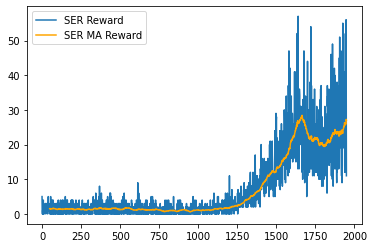

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Reward':  stats.episode_rewards}
df = pd.DataFrame (data)

rolling_mean = df.Reward.rolling(window=50).mean()

plt.plot(df.index, df.Reward, label='SER Reward')
plt.plot(df.index, rolling_mean, label='SER MA Reward', color='orange')
plt.legend(loc='upper left')
plt.show()
df.to_csv('output_SER.csv', index=False)  